## 5.9：主成分分析（Principal Component Analysis）

介绍主成分分析（principal component analysis，PCA），它可能是应用最广的无监督算法之一。虽然 PCA 是一种非常基础的降维算法，但它仍然是一个非常有用的工具，尤其适用于数据可视化、噪音过滤、特征抽取和特征工程等领域。

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

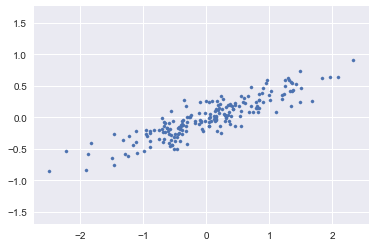

In [8]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.axis('equal');

从图中可以看出，x 变量和 y 变量显然具有线性关系，但与回归分析中希望根据 x 值预测 y 值的思路不同，无监督学习希望探索 x 值和 y 值之间的相关性。

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [10]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [11]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


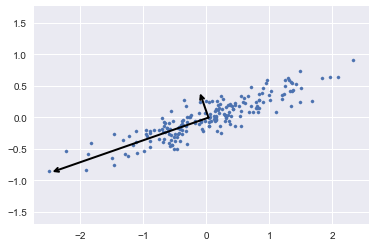

In [16]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops = dict(arrowstyle='->',
                      linewidth=2,
                      shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1,], s=10)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

### Principal Components Rotation

In [14]:
from sklearn.decomposition import PCA

In [15]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops = dict(arrowstyle='->',
                      linewidth=2,
                      shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

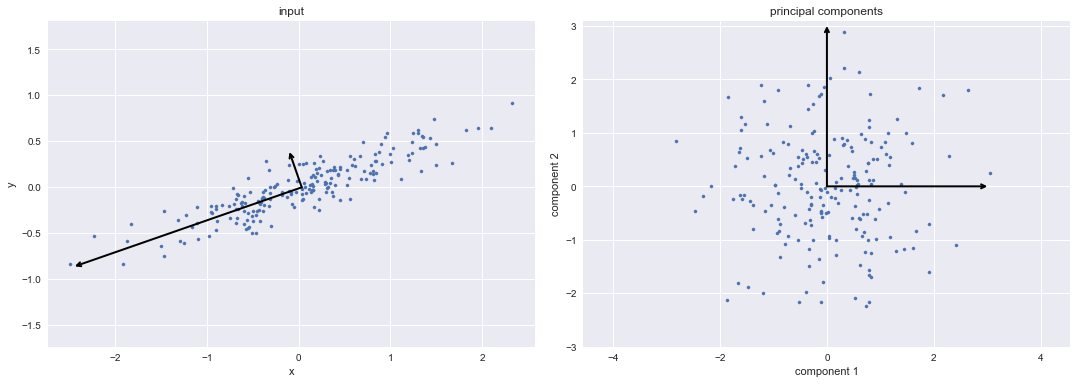

In [19]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
pca = PCA(n_components=2, whiten=True)
pca.fit(X)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# plot data
ax[0].scatter(X[:, 0], X[:, 1,], s=10)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v, ax=ax[0])
ax[0].axis('equal');
ax[0].set(xlabel='x', ylabel='y', title='input')

# plot principal components
X_pca = pca.transform(X)
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], s=10)
draw_vector([0, 0], [0, 3], ax=ax[1])
draw_vector([0, 0], [3, 0], ax=ax[1])
ax[1].axis('equal')
ax[1].set(xlabel='component 1', ylabel='component 2',
          title='principal components',
          xlim=(-5, 5), ylim=(-3, 3.1))

fig.savefig('figures/05.09-PCA-rotation.png')

####  用PCA降维

用 PCA 降维意味着去除一个或多个最小主成分，从而得到一个更低维度且保留最大数据
方差的数据投影。

In [20]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print('original shape    ', X.shape)
print('transformed shape    ', X_pca.shape)

original shape     (200, 2)
transformed shape     (200, 1)


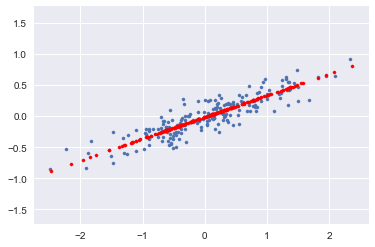

In [22]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.scatter(X_new[:, 0], X_new[:, 1], s=10, color='r')
plt.axis('equal');

2：用PCA作数据可视化：手写数字

In [24]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

该数据包含 8 像素 ×8 像素的图像，也就是说它是 64 维的。为了获得这些数据点间关系的直观感受，使用 PCA 将这些数据投影到一个可操作的维度，比如说二维：

In [27]:
pca = PCA(n_components=2)
projection = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projection.shape)

(1797, 64)
(1797, 2)


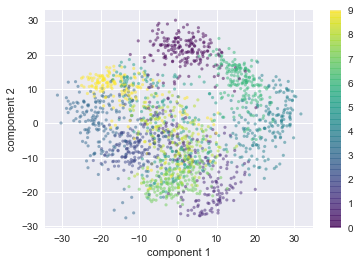

In [32]:
sns.set()
plt.scatter(projection[:, 0], projection[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap='viridis', s=10)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

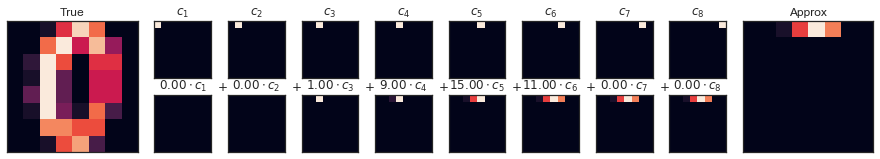

In [26]:
def plot_pca_components(x, coefficients=None, mean=0, components=None,
                        imshape=(8, 8), n_components=8, fontsize=12,
                        show_mean=True):
    if coefficients is None:
        coefficients = x
        
    if components is None:
        components = np.eye(len(coefficients), len(x))
    
    mean = np.zeros_like(x) + mean
    
    fig = plt.figure(figsize=(1.2 * (5 + n_components), 1.2 * 2))
    g = plt.GridSpec(2, 4 + bool(show_mean) + n_components, hspace=0.3)
    
    def show(i, j, x, title=None):
        ax = fig.add_subplot(g[i, j], xticks=[], yticks=[])
        ax.imshow(x.reshape(imshape), interpolation='nearest')
        if title:
            ax.set_title(title, fontsize=fontsize)
            
    show(slice(2), slice(2), x, "True")
    
    approx = mean.copy()
    
    counter = 2
    if show_mean:
        show(0, 2, np.zeros_like(x) + mean, r'$\mu$')
        show(1, 2, approx, r'$1 \cdot \mu$')
        counter += 1
    
    for i in range(n_components):
        approx = approx + coefficients[i] * components[i]
        show(0, i + counter, components[i], r'$c_{0}$'.format(i + 1))
        show(1, i + counter, approx,
             r"${0:.2f} \cdot c_{1}$".format(coefficients[i], i + 1))
        if show_mean or i > 0:
            plt.gca().text(0, 1.05, '$+$', ha='right', va='bottom',
                           transform=plt.gca().transAxes, fontsize=fontsize)
    show(slice(2), slice(-2, None), approx, "Approx")
    return fig
sns.set_style('white')
fig = plot_pca_components(digits.data[10], show_mean=False)

fig.savefig('figures/05.09-digits-pixel-components.png')

面板的上面一行是单独的像素信息，下面一行是这些像素值的累加，累加值最终构成这幅
图像。如果仅使用 8 个像素成分，就仅能构建这个 64 像素图像的一小部分。只有使用该
序列和全部的 64 像素，才能恢复原始图像。

PCA 可以被认为是选择最优基函数的过程，这样将这些基函数中前几个加起来就足以重构
数据集中的大部分元素。用低维形式表现数据的主成分，其实就是与序列每一个元素相乘
的系数。下图是用均值加上前 8 个 PCA 基函数重构数字的效果。

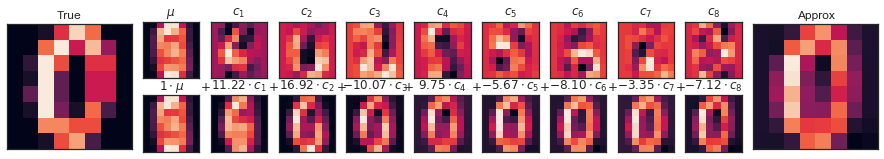

In [33]:
pca = PCA(n_components=8)
Xprojection = pca.fit_transform(digits.data)
sns.set_style('white')
fig = plot_pca_components(digits.data[10], Xprojection[10],
                          pca.mean_, pca.components_)

fig.savefig('figures/05.09-digits-pca-components.png')

与像素基不同，PCA 基可以通过为一个均值加上 8 个成分，来恢复输入图像最显著的特
征。每个成分中像素的数量必然是二维数据示例中向量的方向。这就是 PCA 提供数据的
低维表示的原理：它发现一组比原始的像素基向量更能有效表示输入数据的基函数。

#### 4. 选择成分的数量

在实际使用 PCA 的过程中，正确估计用于描述数据的成分的数量是非常重要的环节。我
们可以将累计方差贡献率看作是关于成分数量的函数，从而确定所需成分的数量

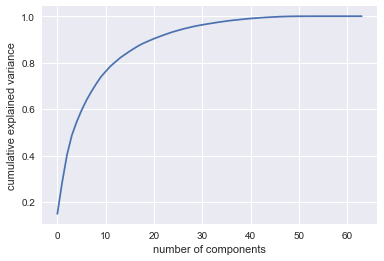

In [37]:
sns.set()
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

这个曲线量化了在前 N 个主成份中包含了多少总的 64 维的方差。例如，可以看到前 10 个
成分包含了几乎 75% 的方差。因此，如果你希望描述接近 100% 的方差，那么就需要大约
50 个成分。

### 5.9.2　用PCA作噪音过滤

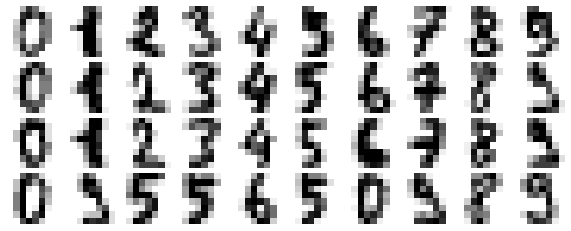

In [38]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                           subplot_kw={'xticks':[], 'yticks':[]},
                           gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

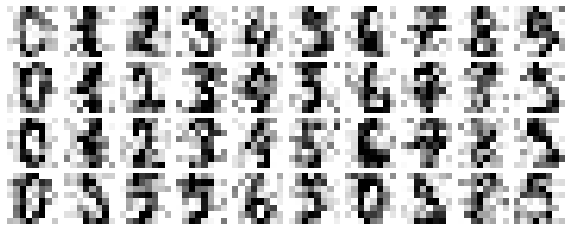

In [39]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

In [40]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

这里 50% 的方差对应 12 个主成份。现在来计算出这些成分，然后利用逆变换重构过滤后
的手写数字

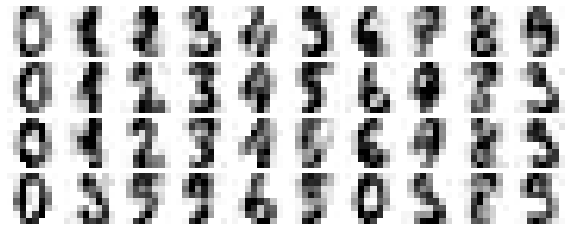

In [41]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

这个信号保留 / 噪音过滤的性质使 PCA 成为一种非常有用的特征选择方式。例如，与其在
很高维的数据上训练分类器，你可以选择在一个低维表示中训练分类器，该分类器将自动
过滤输入数据中的随机噪音。

### 5.9.3　案例：特征脸

In [43]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people()

RuntimeError: Failed to read the image file C:\Users\asus\scikit_learn_data\lfw_home\lfw_funneled\George_HW_Bush\George_HW_Bush_0003.jpg, Please make sure that libjpeg is installed

## 5.9.4　主成分分析总结

这一节讨论了用主成分分析进行降维、高维数据的可视化、噪音过滤，以及高维数据的特
征选择。由于 PCA 用途广泛、可解释性强，所以可以有效应用于大量情景和学科中。对
于任意高维的数据集，我倾向于以 PCA 分析开始，可视化点间的关系（正如手写数字示
例中的处理方式），理解数据中的主要方差（正如特征脸示例中的处理方式），理解固有的
维度（通过画出解释方差比）。当然，PCA 并不是一个对每个高维数据集都有效的算法，
但是它提供了一条直接且有效的路径，来获得对高维数据的洞察。

  经常受数据集的异常点影响是 PCA 的主要弱点。因为这个理由，很多效果更好的 PCA 变
体被开发出来，这些 PCA 变体方法迭代执行，丢弃对原始成分描述得很糟糕的数据点。
Scikit-Learn 中有一些有趣的 PCA 变体，包括 RandomizedPCA 和 SparsePCA，这两个算法也
在 sklearn.decomposition 子模块中。我们刚才看到的 RandomizedPCA 算法使用了一个非确
定方法，快速地近似计算出一个维度非常高的数据的前几个主成分，而 SparsePCA 引入了
一个正则项（详情请参见 5.6 节）来保证成分的稀疏性。